# STRUCTURAL EQUATION MODELS WITH PYTHON

In [69]:
## https://semopy.com/
## Igolkina, Anna A. Mescheryakov, G. semopy: A Python Package for Structural Equation Modeling. Taylor and Francis. Pages 952-963 | Published online: 18 Feb 2020


### Table of Contents

[1. Introduction and General Overview](#1)

[2. Syntax and Relations](#2)

[3. Prediction and imputation](#3)

[4. Factor Scores](#4)

[5. Intercepts](#5)

[6. Mean Components Model](#6)

[7. REML and ML](#7)

[8. Random Effects](#8)

[9. Ordinal Variables](#9)

[10. Fit Metrics](#10)

[11. Confirmatory Factor Analysis](#11)

[12. Visualisation](#12)

[13. Report](#13)


<a id='1'></a>

## 1. Introduction and General Overview

In [ ]:
pip install semopy

In [3]:
import semopy
import pandas as pd

#### Let's inspect a model

In [4]:
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


#### Let's get the associated dataset:

In [4]:
data = semopy.examples.political_democracy.get_data()
print(data.head())

      y1        y2        y3        y4        y5        y6        y7  \
1   2.50  0.000000  3.333333  0.000000  1.250000  0.000000  3.726360   
2   1.25  0.000000  3.333333  0.000000  6.250000  1.100000  6.666666   
3   7.50  8.800000  9.999998  9.199991  8.750000  8.094061  9.999998   
4   8.90  8.800000  9.999998  9.199991  8.907948  8.127979  9.999998   
5  10.00  3.333333  9.999998  6.666666  7.500000  3.333333  9.999998   

         y8        x1        x2        x3  
1  3.333333  4.442651  3.637586  2.557615  
2  0.736999  5.384495  5.062595  3.568079  
3  8.211809  5.961005  6.255750  5.224433  
4  4.615086  6.285998  7.567863  6.267495  
5  6.666666  5.863631  6.818924  4.573679  


#### Fit the model

In [5]:
mod = semopy.Model(desc)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.082 0.467 0.172 0.120 2.352 3.256 3.430 0.448


#### Let's inspect parameters estimates

In [11]:
ins = mod.inspect()
print(ins)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

#### Zoom Into the Fit Method

The fit method has 3 arguments of interest:

1) data — dataset in the form of pandas DataFrame;

2) obj — name of objective function to minimize:
    * "MLW" (the default): Wishart loglikelihood
    * "ULS": Unweighted Least Squares
    * "GLS": Generalized Least Squares
    * "WLS": Weighted Least Squares (also known as an Asymptotic Distribution-Free Estimator)
    * "DWLS": Diagonally Weighted Least Squares (also known as robust WLS)
    * "FIML": Full Information Maximum Likelihood (when data has no missing values FIML is effectively a Multivariate Normal Maximum Likelihood)
  
3) solver — name of optimization method (at the moment only [scipy-minimize methods](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) are available, the default is "SLSQP"). More info on [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

#### Inspecting Resutls

The inspect method returns a pandas DataFrame with parameter estimates and p-values. DataFrame will contain estimates, standard errors, z-scores and p-values (see Built-in examples).  
  
This method, however, is more versatile than it may look at the first glance; it has 3 arguments of interest:
1) **mode** — dictates the behaviour of the method. Can take 2 values:
    1) "list" (the default): DataFrame with estimates is returned;
    2) "mx": Dictionary with model iternal structures (matrices) is returned.
2) **what** — has effect only if mode is "mx"; determines what values are displayed in place of estimated parameters in matrices. Can take 3 values:
    1) "est" (the default): matrices are returned as-is with current parameter estimates;
    2) "start": matrices are returned filled with the starting values of parameters.
    3) "names": instead of values, parameter names/identifiers are displayed in place of their respective parameters.
3) **std_est** -- if True or "lv", standardized coefficients are also returned (non-output variables are not standardized in case of "lv"). The default is False.

<a id='2'></a>

## 2. Syntax and Relations

Relations typically consist of left-sided variables (lvalues) and right-sided values (rvalues) separated by an operator character that constitutes the nature of relationship between lvalues and rvalues. In semopy, lvalues are separated by a comma "," sign and rvalues are separated by a plus "+" sign. The supported operators are:

#### Regression operator: `y ~ x1 + x2 + x3`

Constituted by a tilde symbol ~ implies that rvalues regress onto lvalues. For instance, consider a multivaraite regression model where it implies that x1, x2, x3 regress onto y.

#### Measurement operator: `eta =~ y1 + y2 + y3`

Defined by =~ symbols, it's effectively a syntax sugar and translates into a regression operator with lvalues and rvalues swapped. However, it also postulates that lvalues are latent variables and, unless specified otherwise, fixes the first loading in the relationship between a latent factor and an observed variable to 1.0 It introduces a latent factor eta into the model that regresses onto y1, y2, y3. The first regression coefficient between y1 and eta is fixed to 1.0.

#### Covariance operator `a ~~ b + c` `c ~~ c`

Variances and covariances between variables are defined by ~~ symbols. The above example adds covariance parameters between a and b, between a and c, and parametrises variance of c.

When comma , sign is used in an lvalue part of a relation, the relation is effectively duplicated for each lvalue:

`y1, y2 ~ x1 + x2 + x3` translates into `y1 ~ x1 + x2 + x3` `y2 ~ x1 + x2 + x3`

#### Naming Variables on the fly

Variables in the right-value part of relations can be preceeded with either a string or a float separated by a * character. If it is a string, then it will be assigned to the corresponding parameter as its new name. It can be used either to reuse the same parameter in different parts of SEM model or to refer it in constraints. The name of parameter will be seen if inspect method of the Model is called with an appropriate arguments, for example:

In [20]:
from semopy import Model
from semopy.examples import multivariate_regression

desc = '''y1 ~ x1 + JuanRodriguez*x2 + MissLetty*x3'''
data = multivariate_regression.get_data()
mod = Model(desc)
mod.fit(data)
print(mod.inspect('mx', what='names')['Lambda'])

     x1             x2         x3
y1  _b1  JuanRodriguez  MissLetty
x1  1.0            0.0        0.0
x2  0.0            1.0        0.0
x3  0.0            0.0        1.0


#### Fixing Parameters to Constant values

In [22]:
from semopy import Model
from semopy.examples import \
     multivariate_regression

desc = '''y1 ~ x1 + 6*x2 + x3'''
data = multivariate_regression.get_data()
mod = Model(desc)
mod.fit(data)
print(mod.inspect())

  lval  op rval   Estimate  Std. Err   z-value   p-value
0   y1   ~   x1  -1.250803  0.600134 -2.084207  0.037141
1   y1   ~   x2   6.000000         -         -         -
2   y1   ~   x3   0.241955  0.590724  0.409591  0.682106
3   y1  ~~   y1  42.637130  6.029801  7.071068       0.0


### Operations and Constraints

Operations are actions that are to be performed onto certain semopy entities, such as variables or parameters. In semopy, operations have structure OperationName(OperationParameters) entity_1, entity_2, ..., entity_n. Model supports the following operations:

**DEFINE(latent)**

In [ ]:
desc='''y1 ~ 1.0 * eta1
        y2, y3 ~ eta1 + eta2
        y3 ~ 1.5 * eta2
        DEFINE(latent) eta1 eta2'''

data = multivariate_regression.get_data()
mod = Model(desc)
mod.fit(data)
print(mod.inspect())

It sets variables eta1, eta2 as latents. Notice that this is the same as:

`eta1 =~ y1 + y2 + y3`  

`eta2 =~ y2 + y3 + 1.5*y4`

**DEFINE(ordinal)**

Makes semopy treat variables as ordinal, i.e. their polychoric and/or polyserial correlations will be estimated. Valid only for Model.

In [ ]:
'''y ~ x1 + cat1 + cat2
   DEFINE(ordinal) cat1 cat2'''

Here, Pearsons correlations between cat1 and cat2 variables will be substituted with polychoric correlations, and correlations inbetween cat1, cat2 and x, y with polyserial correlations.

**START(x)**

Sets starting value x to parameters. Example:

In [ ]:
'''y ~ a*x1 + b*x2 + c*x3
   START(1.5) a b
   START(-5) c'''

**BOUND(l, r)**

Sets bound constraints in interval (l, r) to parameters

In [ ]:
'''y ~ x1 + x2 + x3
   y ~~ a * y
   BOUND(4, 100) a'''

**CONSTRAINT(constr)**

In [ ]:
'''y ~ a * x1 + b * x2 + c * x3
   y ~~ v * y
   START(6) b
   CONSTRAINT(exp(a) + log(b) = 10)
   CONSTRAINT(v > cos(a)^2 + sin(b)^2)```

Any sympy-compaitble formula can be supplied as constr.

<a id='3'></a>

## 3. Prediction and imputation

All semopy models are equipped with predict method that does a SEM regression onto missing data given at least some of the observed variables. The regression is done by means of a conditional expectation of the vector of missing variables given some of the observed.
  
The predict method always returns a DataFrame with all the variables present in the model. The DataFrame that is passed to predict is merely an information on the data present, everything that is lacking in the DataFrame will be guessed by the predict routine. It's possible to pass a DataFrame with an arbitrary set of available variables in it with missing values. Furthermore, if one passes a DataFrame with missing values and an employed semopy model supports missing data, then it can be thought of as a prediction scheme. Example:

In [37]:
from semopy.examples import political_democracy
from semopy import ModelMeans
import numpy as np

desc = political_democracy.get_model()
data = political_democracy.get_data()

i, v = 0, 'x1'
x = data[v].values[i]

data[v].values[i] = float('nan')
model = ModelMeans(desc)
model.fit(data, )
preds = model.predict(data)
diff = np.abs((x - preds[v].values[i])/x)
print('relative error is {:.2f}%'.format(diff * 100))

relative error is 2.17%


If you use ModelMeans, ModelEffects or ModelGeneralizedEffects and don't need to impute missing data, you can quickly predict observed endogenous and latent variables by a known (at least, partially) set of exogenous variables by invoking the predict_exo method. Unlike predict, it considers only exogenous variables data for prediction. If any of the values in exogenous data are missing, or even if some of the exogenous variables themselves are missing, the missing values will be imputed with zeros.

<a id='4'></a>

## 4. Factor Scores

Models in semopy are equipped with predict_factors method that can be used for factor scores estimation. Let's see how the method works with Political Democracy dataset:

In [39]:
from semopy.examples import political_democracy
from semopy import Model

desc = political_democracy.get_model()
data = political_democracy.get_data()

model = Model(desc)
model.fit(data)
factors = model.predict_factors(data)
print(factors.head())

      dem60     dem65     ind60
0 -2.539528 -2.368729 -0.536216
1 -2.345362 -1.513466  0.151093
2  2.925690  2.998107  0.740218
3  2.883632  3.021921  1.244115
4  2.428383  2.422393  0.831255


<a id='5'></a>

## 5. Intercepts

Although rarely necessary, sometimes researcher might be interested in observed variables' means. It's straightforward to estimate means after estimating variance components. After obtaining variance components, we can estimate means using a GLS procedure by calling a estimate_means function:

In [41]:
from semopy.examples import multivariate_regression
from semopy.means import estimate_means
from semopy import Model

desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()

model = Model(desc)
model.fit(data)
print(estimate_means(model))

  lval op rval  Estimate
0   x1  ~    1 -0.043750
1   x2  ~    1  0.073704
2   x3  ~    1 -0.056712
3   y1  ~    1 -1.456624
4   y2  ~    1  0.929309
5   y3  ~    1  0.992039


Notice that exogenous variables x1, x2, x3 means are equal to their sample means (as expected) by calling

In [42]:
print(data.mean())

y1   -1.461698
y2    1.105265
y3    1.104522
x1   -0.043750
x2    0.073704
x3   -0.056712
dtype: float64


<a id='6'></a>

## 6. Mean Components Model

semopy has a different model called ModelMeans that differs from Model in a way that it estimates mean components simultaneously with variance components as in a classical multivariate-normal MLE.

In [44]:
from semopy.examples import multivariate_regression
from semopy import ModelMeans
desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()

model = ModelMeans(desc)
model.fit(data)
print(model.inspect())

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    y1   ~   x1 -1.389720  0.073417 -18.929022  0.000000e+00
1    y1   ~   x2 -1.138398  0.087966 -12.941384  0.000000e+00
2    y1   ~   x3 -0.317953  0.072576  -4.380966  1.181546e-05
3    y2   ~   x1 -0.745740  0.097969  -7.611965  2.708944e-14
4    y2   ~   x2  1.074526  0.117383   9.154020  0.000000e+00
5    y2   ~   x3 -1.130938  0.096847 -11.677611  0.000000e+00
6    y3   ~   x1  0.702778  0.064269  10.934870  0.000000e+00
7    y3   ~   x2  1.235047  0.077005  16.038535  0.000000e+00
8    y3   ~   x3 -0.920454  0.063533 -14.487837  0.000000e+00
9    y1   ~    1 -1.456621  0.080268 -18.147061  0.000000e+00
10   y2   ~    1  0.929294  0.107110   8.676035  0.000000e+00
11   y3   ~    1  0.992040  0.070266  14.118332  0.000000e+00
12   y3  ~~   y3  0.488724  0.069116   7.071068  1.537437e-12
13   y2  ~~   y2  1.135630  0.160602   7.071068  1.537437e-12
14   y1  ~~   y1  0.637755  0.090192   7.071068  1.537437e-12


In semopy syntax, character 1 stands for an intercept. It can be manipulated and specified the in the model formulation the same way as any other variable, however in ModelMeans it is assumed that all endogenous observed variables have intercepts by default. This behaviour can be disabled by setting intercepts argument of the ModelMeans constructor to `False` i.e. `model = ModelMeans(desc, intercepts=False)`. In most cases it will produce the same estimates for other parameters if the data was centered beforehand (for example, by setting `data -= data.mean()`)

In [45]:
desc = multivariate_regression.get_model()
data -= data.mean()

model = ModelMeans(desc)
model.fit(data)
print(model.inspect())

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    y1   ~   x1 -1.389716  0.073417 -18.929138  0.000000e+00
1    y1   ~   x2 -1.138370  0.087965 -12.941189  0.000000e+00
2    y1   ~   x3 -0.317955  0.072575  -4.381037  1.181158e-05
3    y2   ~   x1 -0.745763  0.097970  -7.612163  2.686740e-14
4    y2   ~   x2  1.074512  0.117383   9.153864  0.000000e+00
5    y2   ~   x3 -1.130931  0.096847 -11.677491  0.000000e+00
6    y3   ~   x1  0.702797  0.064268  10.935419  0.000000e+00
7    y3   ~   x2  1.235039  0.077003  16.038796  0.000000e+00
8    y3   ~   x3 -0.920443  0.063531 -14.487978  0.000000e+00
9    y1   ~    1 -0.000004  0.079859  -0.000047  9.999624e-01
10   y2   ~    1  0.000025  0.106566   0.000236  9.998119e-01
11   y3   ~    1 -0.000002  0.069907  -0.000026  9.999793e-01
12   y3  ~~   y3  0.488703  0.069113   7.071068  1.537437e-12
13   y2  ~~   y2  1.135639  0.160604   7.071068  1.537437e-12
14   y1  ~~   y1  0.637743  0.090190   7.071068  1.537437e-12


ModelMeans also has one arguable advantage over Model: as exogeneous variables are ruled out to a mean component, we can make no distribution assumptions on their nature.

<a id='7'></a>

## 7. REML and ML

The idea behind Restricted Maximum Likelihood (REML) is to find a data tranform (preferably a full-rank) that strips the model off the mean component. It allows to separate parameters into two independendent subsets and then perform an optimization procedure on each of the subsets. This, in turn, produces an unbiased estimates of variance parameters. It also might facilitate optimization routine as two smaller problems are being solved instead of one big problem, as in ML.

In our tests, ML tends to produce an insignificantly smaller RMSE of parameters estimates than REML, however REML managed to achieve convergence on a slightly bigger number of models. Also, it is much faster. To switch to the REML estimator, pass `"REML"` to an obj argument in fit method:

In [46]:
from semopy.examples import multivariate_regression
from semopy import ModelMeans
desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()

model = ModelMeans(desc)
model.fit(data, obj="REML")
print(model.inspect())

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    y1   ~   x1 -1.389720  0.074932 -18.546486  0.000000e+00
1    y1   ~   x2 -1.138386  0.089780 -12.679722  0.000000e+00
2    y1   ~   x3 -0.317946  0.074073  -4.292328  1.768093e-05
3    y2   ~   x1 -0.745751  0.099991  -7.458144  8.770762e-14
4    y2   ~   x2  1.074511  0.119806   8.968792  0.000000e+00
5    y2   ~   x3 -1.130937  0.098846 -11.441458  0.000000e+00
6    y3   ~   x1  0.702782  0.065594  10.714155  0.000000e+00
7    y3   ~   x2  1.235053  0.078592  15.714799  0.000000e+00
8    y3   ~   x3 -0.920453  0.064842 -14.195310  0.000000e+00
9    y1   ~    1 -1.456627  0.081923 -17.780402  0.000000e+00
10   y2   ~    1  0.929302  0.109321   8.500665  0.000000e+00
11   y3   ~    1  0.992041  0.071714  13.833309  0.000000e+00
12   y3  ~~   y3  0.509073  0.071994   7.071068  1.537437e-12
13   y2  ~~   y2  1.182989  0.167300   7.071068  1.537437e-12
14   y1  ~~   y1  0.664334  0.093951   7.071068  1.537437e-12


<a id='8'></a>

## 8. Random Effects

![](./www/random_effects_groups.png)
  
In many cases, the researcher must take the population structure into account. The presence of this structure in the model can be represented as autocorrelation, i.e. observations of the sample are not inpedendent from the observations in the population. Other popular ways to represent population structures are by means of groups or clusters in the data.
  
One way to interpret this dependence is to assume that there is an unique additive vector per group (a "group mean"). 

The two samples of points from groups A and B are assumed to be affected by an unkown effect O. Dashed arrows of red and green colours are unknown per-individual shifts caused by the random effect for groups A and B respectively. The lack arrows are estimators for random effects for each group. The presence of a priori information on the angle between mean vectors is helpful but not neccessary where there are multiple individuals per group



Group-wise means can be a good estimator of random effects. In fact, fitting a model to data which is centered with respect to groups is the same as fitting the model to within-covariance matrix.

semopy can do group-wise centering automatically by supplying a group's argument with a list of group names (data columns) to the fit method. For instance, let's assume a toy example of multivariate regression model and let's add random noise across 3 groups to the dataset:

In [61]:
from semopy.examples import multivariate_regression
from semopy import ModelMeans

desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()
data['group'] = 0
np.random.seed(10)
U =  np.array([np.random.normal(scale=1, size=1).flatten() for _ in range(3)])
data.iloc[0:25, 3] +=  U[0].flatten()
data.iloc[0:25, -1] = 0
data.iloc[25:50, 3] += U[1].flatten()
data.iloc[25:50, -1] = 1
data.iloc[50:75, 3] +=  U[2].flatten()
data.iloc[50:75, -1] = 2

mod = ModelMeans(desc)
mod.fit(data, groups=['group'])
print(mod.inspect())

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    y1   ~   x1 -0.684502  0.092260  -7.419257  1.176836e-13
1    y1   ~   x2 -1.077002  0.151021  -7.131466  9.929835e-13
2    y1   ~   x3 -0.251501  0.124333  -2.022807  4.309302e-02
3    y2   ~   x1 -0.412799  0.079634  -5.183678  2.175527e-07
4    y2   ~   x2  1.081677  0.130354   8.298006  0.000000e+00
5    y2   ~   x3 -1.087719  0.107318 -10.135501  0.000000e+00
6    y3   ~   x1  0.335176  0.061608   5.440424  5.315405e-08
7    y3   ~   x2  1.203047  0.100847  11.929416  0.000000e+00
8    y3   ~   x3 -0.953049  0.083025 -11.479006  0.000000e+00
9    y1   ~    1  0.120980  0.137894   0.877337  3.803036e-01
10   y2   ~    1 -0.107725  0.119023  -0.905074  3.654262e-01
11   y3   ~    1 -0.170086  0.092081  -1.847132  6.472801e-02
12   y3  ~~   y3  0.838557  0.118590   7.071068  1.537437e-12
13   y2  ~~   y2  1.401048  0.198138   7.071068  1.537437e-12
14   y1  ~~   y1  1.880532  0.265947   7.071068  1.537437e-12


### Example with correlated observations

A case of non-independent observations can be thought as data where each individual resides in a group of size 1. For each observation there is a unique vector that causes some "group-specific" (i.e. observation-specific) shift.

![](./www/random_effects_indiv.png)
  
In general, there is no way we can extract those random effect vectors from the data. However, if we have information on the angle between those vectors, or cosines, it might be possible to control for them. The elements of K matrix are essentialy those cosines. How K is obtained is up to a researcher, however. In timeseries analysis, it can be a model matrix that assumes certain time-based dependence model.
  
semopy has a built-in example with data already containing random effects:

`eta1 =~ y1 + y2`  
`eta2 =~ y3 + y4`  
`x2 ~ eta1`  
`eta2 ~ eta1`  
`x1 ~ eta1`  

In [68]:
from semopy.examples import example_rf

desc = example_rf.get_model()
data, k = example_rf.get_data()

model = ModelEffects(desc)
model.fit(data, group='group', k=k)
print(model.inspect())

    lval  op  rval      Estimate      Std. Err    z-value   p-value
0   eta2   ~  eta1  2.935124e+00      0.221936  13.225065       0.0
1     y1   ~  eta1  1.000000e+00             -          -         -
2     y2   ~  eta1  3.068221e+00      0.227668  13.476736       0.0
3     y3   ~  eta2  1.000000e+00             -          -         -
4     y4   ~  eta2 -2.392335e-02      2.679432  -0.008929  0.992876
5     x2   ~  eta1  2.127309e+00      0.170104  12.505911       0.0
6     x1   ~  eta1 -2.366392e+00      0.185143 -12.781425       0.0
7     x2   ~     1  3.446531e-01      0.595682   0.578585  0.562869
8     x1   ~     1 -5.109442e-01      0.658431  -0.776003  0.437747
9     y1   ~     1  3.778720e-01      0.302037   1.251079  0.210906
10    y2   ~     1  6.742080e-01       0.84121   0.801474  0.422857
11    y3   ~     1  5.946742e-01      0.808879   0.735183  0.462228
12    y4   ~     1 -9.486492e-01     14.949079  -0.063459  0.949401
13  eta2  ~~  eta2  0.000000e+00  10755.911083  

<a id='9'></a>

## 9. Ordinal variables

We conider a variable to be ordinal if it has a categorical non-continuous nature (for instance, if we can encode it as an integer), and if you can meaningfully sort it (it is possible to impose a total order relation). Simple example of an ordinal variable is size encoded as "Tiny", "Small", "Average", "Big".
There are 2 ways to treat ordinal variables in semopy:

1) Fixed effects: If in your SEM model ordinal variables are also exogenous, its should be all right to treat those variables as fixed effects. This is done automatically if you use ModelMeans or ModelEffects. However, results are subject to change under different encodings of ordinal variables in the data.

2) Heterogenous correlation matrix: Heterogenous correlation matrix is a correlation matrix where correlations between ordinal variables are calculated as polychoric correlations, and correlations between ordinal and continious variables are calculated as polyserial correlations.

DEFINE(ordinal) makes semopy treat variables as ordinal, i.e. their polychoric and/or polyserial correlations will be estimated.

In [70]:
'''y ~ x1 + cat1 + cat2
   DEFINE(ordinal) cat1 cat2'''

'y ~ x1 + cat1 + cat2\n   DEFINE(ordinal) cat1 cat2'

Here, Pearsons correlations between cat1 and cat2 variables will be substituted with polychoric correlations, and correlations inbetween cat1, cat2 and x, y with polyserial correlations.

This has some drawbacks:
* Heterogenous correlations matrix takes a long time to compute and the time increases drastically as increases the number of observations and the number odinal variables.
* Sometimes, heterogenous correlation matrix is not positive-definite, and semopy will find the closest positive-definite matrix. It might result in some original information deformation.
* It works only for Model.

<a id='10'></a>

## 10. Fit Metrics

semopy has numerous fit metrics that help to evaluate SEM models, namely: 
  
* $\chi^{2}$

* RMSEA 
* CFI, 
* TLI 
* NFI 
* GFI
* AGFI. For details on how those indices are calculated in semopy, see

In [71]:
data = semopy.examples.political_democracy.get_data()
mod = semopy.examples.political_democracy.get_model()
m = semopy.Model(mod)
res = m.fit(data)
stats = semopy.calc_stats(m)
print(stats.T)

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


<a id='11'></a>

## 11. Confirmatory Factor Analysis

As the name suggests, explore_cfa_model helps to retrieve a Confirmatory Factor Analysis model from the dataset, i.e. a model with latent factors that covary with each other. The function has the following arguments of interest:
1) data — dataset in the form of pandas DataFrame
2) min_loadings — expected minimal number of indicators per latent factor. The default is 2. It is better to be left at 2, as it is rare for the procedure to finish its work with less than 3 indicators per factor, yet a higher number might penalize it too much.
3) pval — the p-value cutoff value. The model is guaranteed to have all regression coefficients to be at least as significant as this cutoff margin. The default is 0.01.

### Pine model

Pine model is a generalization of CFA model. In Pine setting, the latent factors of the CFA model become indicators of some other "higher level" latent factor.  
explore_pine_model has the following arguments of interest:
1) data — dataset in the form of pandas DataFrame
2) min_loadings — expected minimal number of indicators per latent factor. The default is 2. It is better to be left at 2, as it is rare for the procedure to finish it is work with less than 3 indicators per factor, yet a higher number might penalize it too much;
4) pval — the p-value cutoff value. The model is guaranteed to have all regression coefficients to be at least as significant as this cutoff margin. The default is 0.01.
5) levels — number of levels. If 1, the result will be the same as explore_cfa_model. Higher values allow for a more hierarchical model. The default is 2.

In [75]:
np.random.seed(123)

N = 100
eta1 = np.random.normal(size=N)
eta2 = np.random.normal(size=N)
eta1 += 0.3 * eta2

y1 = np.random.normal(size=N, scale=0.5) + eta1
y2 = np.random.normal(size=N, scale=0.5) + 2 * eta1
y3 = np.random.normal(size=N, scale=0.5) + 3 * eta1 + eta2
y4 = np.random.normal(size=N, scale=0.5) - eta2
y5 = np.random.normal(size=N, scale=0.5) + 1.5 * eta2
x = np.random.normal(size=N)
data_tr = pd.DataFrame([y1, y2, y3, y4, y5, x],
                    index=['y1', 'y2', 'y3', 'y4', 'y5', 'x']).T

print(semopy.efa.explore_cfa_model(data_tr))

eta1 =~ y2 + y3 + y1
eta2 =~ y5 + y4 + y3



It is exactly the model that was used for data generation.

<a id='12'></a>

In [ ]:
## 12. Visualization

Arguments:
1) mod — semopy Model instance;
2) filename — name of file where to plot is saved;
3) plot_covs — If True, covariances are also drawnimport semopy

data = semopy.examples.political_democracy.get_data()
mod = semopy.examples.political_democracy.get_model()
m = semopy.Model(mod)
m.fit(data)
g = semopy.semplot(m, "pd.png"). The default is False;
4) plot_exos — If False, exogenous variables are not plotted. It might be useful, for example, in GWAS setting, where a number of exogenous variables, i.e. genetic markers, is oblivious. Has effect only with ModelMeans or ModelEffects. The default is True.
5) images — node labels can be replaced with images. It will be the case if a map variable_name->path_to_image is provided.

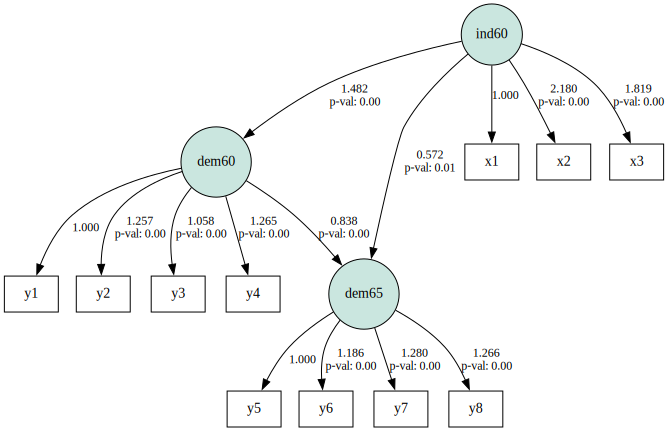

In [5]:
import semopy

data = semopy.examples.political_democracy.get_data()
mod = semopy.examples.political_democracy.get_model()
m = semopy.Model(mod)
m.fit(data)
semopy.semplot(m, "pd.png")

In [4]:
print(mod)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


<a id='13'></a>

In [ ]:
## 13. Report

Previously, it has been demonstrated how to extract valuable information from the fitted model programmaticaly by means of different functions and methods. semopy provides a report function that takes a fitted model and generates an HTML file. See an example:

In [6]:
from semopy.examples import political_democracy
from semopy import ModelMeans, report

desc = political_democracy.get_model()
data = political_democracy.get_data()
model = ModelMeans(desc)
model.fit(data)
report(model, "Political Democracy")